In [1]:
    #libraries import
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import glob

from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [223]:
# data read and types check
df = pd.read_csv('gut_full_feature_table.csv')
print(df.shape)
print(df.dtypes)
df.head()

(124, 127)
pond                                                                                           object
d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae             float64
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae       float64
d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae                    float64
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae                    float64
                                                                                               ...   
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae           float64
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae      float64
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Crocinitomicaceae           float64
d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales

,pond,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae,d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae,d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Dysgonomonadaceae,...,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alteromonadales;f__Alteromonadaceae,d__Bacteria;p__Acidobacteriota;c__Vicinamibacteria;o__Vicinamibacterales;f__uncultured,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae,d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Sporomusaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Alcaligenaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Crocinitomicaceae,d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales;f__Arcobacteraceae,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae
0,Gut_S10,2319.0,2187.0,1743.0,500.0,521.0,286.0,366.0,612.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gut_S10,3391.0,2071.0,355.0,1054.0,1024.0,1952.0,66.0,217.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gut_S10,1338.0,7053.0,669.0,279.0,329.0,63.0,52.0,1338.0,139.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gut_S10,1582.0,15595.0,124.0,503.0,309.0,5.0,3418.0,326.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gut_S10,1463.0,3891.0,541.0,7.0,13.0,11.0,61.0,398.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
# checking for uniformity of  records
df['pond'].value_counts().values

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 4], dtype=int64)

In [225]:
# as we are missing one row from our Gut_s8 pond we will add it with values 0
# create zero row 
zeros_row = pd.DataFrame([[0] * len(df.columns)], columns=df.columns)
zeros_row['pond'] = 'Gut_S8'
# add zero row to dataframe
df = pd.concat([df, zeros_row], ignore_index=True)


in this approach we will fill missing values as 0, after normalisation we will change those values to some small number - 0.00001

In [226]:
df = df.fillna(0)


df.head()

,pond,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae,d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae,d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Dysgonomonadaceae,...,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alteromonadales;f__Alteromonadaceae,d__Bacteria;p__Acidobacteriota;c__Vicinamibacteria;o__Vicinamibacterales;f__uncultured,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae,d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Sporomusaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Alcaligenaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Crocinitomicaceae,d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales;f__Arcobacteraceae,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae
0,Gut_S10,2319.0,2187.0,1743.0,500.0,521.0,286.0,366.0,612.0,160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Gut_S10,3391.0,2071.0,355.0,1054.0,1024.0,1952.0,66.0,217.0,95.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Gut_S10,1338.0,7053.0,669.0,279.0,329.0,63.0,52.0,1338.0,139.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Gut_S10,1582.0,15595.0,124.0,503.0,309.0,5.0,3418.0,326.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Gut_S10,1463.0,3891.0,541.0,7.0,13.0,11.0,61.0,398.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
print(df.shape)
df.describe()

(125, 127)


,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae,d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae,d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Dysgonomonadaceae,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae,...,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alteromonadales;f__Alteromonadaceae,d__Bacteria;p__Acidobacteriota;c__Vicinamibacteria;o__Vicinamibacterales;f__uncultured,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae,d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Sporomusaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Alcaligenaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Crocinitomicaceae,d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales;f__Arcobacteraceae,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae
count,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.00000,125.000000
mean,825.000000,8623.624000,170.000000,70.568000,104.70400,194.640000,672.000000,372.848000,52.744000,25.040000,...,0.096000,0.296000,0.080000,2.136000,0.216000,1.59200,0.152000,0.096000,0.26400,0.184000
std,1118.057114,5635.378421,224.102619,146.300913,191.94476,635.567024,2835.113476,456.175459,98.200659,67.317184,...,1.073313,2.261259,0.894427,20.854853,2.085217,13.75013,1.699412,1.073313,2.52773,2.057183
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
25%,106.000000,3900.000000,37.000000,0.000000,0.00000,6.000000,0.000000,51.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
50%,462.000000,7411.000000,105.000000,2.000000,13.00000,27.000000,0.000000,211.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
75%,1027.000000,12744.000000,240.000000,91.000000,131.00000,118.000000,48.000000,462.000000,61.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
max,6597.000000,26160.000000,1743.000000,1054.000000,1024.00000,5020.000000,23193.000000,2505.000000,581.000000,539.000000,...,12.000000,23.000000,10.000000,232.000000,23.000000,144.00000,19.000000,12.000000,28.00000,23.000000


Becouse we have a lot of big numbers and a lot of variation between collumns we might try to normalise the data for better results, on the other hand we could also not normalise so itll be easier for model to discover differences between bacteria abduance as a predictor value. our next steps are:
- plot our data to see for any outliers (ask prof) ew. outlier treatment 
- convert classification variable (target variable)
- create predictors and target varaiable sets
- normalise predictors set 

## Data formatting and normalisation

In [228]:
# replacing zeroes with small number
#df.iloc[:,1:] = df.iloc[:,1:].replace(0,0.00001)

In [229]:
#normalisation by collumns
#df[predictors]=df[predictors]/df[predictors].max()

#normalisation by rows but only for not aggregated  data 
df.iloc[:,1:] = df.iloc[:,1:].apply(lambda row: row / row.max(axis=0), axis=0)

#checksum
#df.iloc[1,1:].sum()

In [230]:
df.describe()

,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae,d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae,d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Dysgonomonadaceae,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae,...,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alteromonadales;f__Alteromonadaceae,d__Bacteria;p__Acidobacteriota;c__Vicinamibacteria;o__Vicinamibacterales;f__uncultured,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae,d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Sporomusaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Alcaligenaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Crocinitomicaceae,d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales;f__Arcobacteraceae,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,0.125057,0.329649,0.097533,0.066953,0.102250,0.038773,0.028974,0.148842,0.090781,0.046456,...,0.008000,0.012870,0.008000,0.009207,0.009391,0.011056,0.008000,0.008000,0.009429,0.008000
std,0.169480,0.215420,0.128573,0.138805,0.187446,0.126607,0.122240,0.182106,0.169020,0.124893,...,0.089443,0.098316,0.089443,0.089892,0.090662,0.095487,0.089443,0.089443,0.090276,0.089443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.016068,0.149083,0.021228,0.000000,0.000000,0.001195,0.000000,0.020359,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.070032,0.283295,0.060241,0.001898,0.012695,0.005378,0.000000,0.084232,0.006885,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.155677,0.487156,0.137694,0.086338,0.127930,0.023506,0.002070,0.184431,0.104991,0.027829,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## conversion of class variable


Explanation of pond coding
| number | setup | pond numbers | water supplementation | feed suplementation |
|---|---|---|---|---|
|0|control | 8,14,18,24,29|NO|NO|
|1|set 1 | 12,16,19,23,26|Em farma|NO|
|2|set 2 | 10,21,28,30,32|Em farma|EM|
|3|set 3 | 9,13,17,20,27|EM|NO|
|4|set 4 | 11,15,22,25,31|EM|EM|

In [231]:
#creting decoder 

def pond_decoder(x):
    codes = {0 : [8,14,18,24,29], 1: [12,16,19,23,26], 2 : [10,21,28,30,32], 3 : [9,13,17,20,27], 4 : [11,15,22,25,31]}
    x=x.replace('S','')
    num = int(x.split("_")[1])
    
    
    for key, value_list in codes.items():
        if num in value_list:
            return key
    
    return None   
#pond_decoder("gut_14")

## grouping data (not used not succesfull)
We want to change our current dataset so in cells it has lists of bacteria abduance with elemets from samples for each pond

In [232]:
#grouping values based on pond and aggregating them to list in cells 
df_l=df.groupby('pond').agg(lambda x: x.tolist())
df_l.reset_index(inplace=True)
df_l

C:\Users\marek\AppData\Local\Temp\ipykernel_20404\3554832122.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_l.reset_index(inplace=True)


,pond,d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Aeromonadales;f__Aeromonadaceae,d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Yersiniaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae,d__Bacteria;p__Fusobacteriota;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Dysgonomonadaceae,...,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Alteromonadales;f__Alteromonadaceae,d__Bacteria;p__Acidobacteriota;c__Vicinamibacteria;o__Vicinamibacterales;f__uncultured,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__Pedosphaeraceae,d__Bacteria;p__Firmicutes;c__Negativicutes;o__Veillonellales-Selenomonadales;f__Sporomusaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Alcaligenaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Vibrionales;f__Vibrionaceae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Crocinitomicaceae,d__Bacteria;p__Campilobacterota;c__Campylobacteria;o__Campylobacterales;f__Arcobacteraceae,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae
0,Gut_S10,"[0.35152341973624374, 0.5140215249355767, 0.20...","[0.08360091743119266, 0.07916666666666666, 0.2...","[1.0, 0.20367183017785429, 0.3838209982788296,...","[0.47438330170777987, 1.0, 0.2647058823529412,...","[0.5087890625, 1.0, 0.3212890625, 0.3017578125...","[0.05697211155378486, 0.3888446215139442, 0.01...","[0.0157806234639762, 0.002845686198421938, 0.0...","[0.24431137724550897, 0.08662674650698603, 0.5...","[0.27538726333907054, 0.16351118760757316, 0.2...",...,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]"
1,Gut_S11,"[0.17962710322874034, 0.07897529179930271, 0.0...","[0.28329510703363914, 0.11498470948012232, 0.4...","[0.1623637406769937, 0.11072862880091795, 0.03...","[0.020872865275142316, 0.0730550284629981, 0.0...","[0.14453125, 0.7890625, 0.0185546875, 0.442382...","[0.006772908366533864, 0.02111553784860558, 0....","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.27664670658682633, 0.07664670658682635, 0.0...","[0.08605851979345955, 0.13769363166953527, 0.0...",...,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]"
2,Gut_S12,"[0.05805669243595574, 0.03910868576625739, 0.0...","[0.20470183486238533, 0.6220948012232416, 0.40...","[0.14400458978772232, 0.04819277108433735, 0.0...","[0.10056925996204934, 0.09013282732447818, 0.1...","[0.037109375, 0.03515625, 0.0546875, 0.1113281...","[0.0, 0.0, 0.0, 0.00597609561752988, 0.0]","[0.009183805458543526, 0.0, 0.0, 0.00206958996...","[0.007984031936127744, 0.1844311377245509, 0.0...","[0.008605851979345954, 0.0051635111876075735, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]"
3,Gut_S13,"[0.2639078368955586, 0.1294527815673791, 0.067...","[0.12014525993883791, 0.0448394495412844, 0.17...","[

In [233]:
df_l['pond'] = df_l['pond'].apply(lambda x: pond_decoder(x))
df_l['pond'] = df_l['pond'].astype('category')

## Creating X and y

In [234]:
# creation of X 
X = df.iloc[:,1:].to_numpy().astype('float32')
X=X.reshape(25,5,126,1)
y=df['pond'].unique()
print(X.shape,y.shape)


(25, 5, 126, 1) (25,)


In [235]:
# creation of X # different approach to input (not used)
X = df.iloc[:,1:].to_numpy().astype('float32')
X=X.reshape(125,1,126,1)
y=df['pond']
#y=df['pond'].unique()

print(X.shape,y.shape)


(125, 1, 126, 1) (125,)


In [236]:
# converting y to experimental setups 



y = np.array([pond_decoder(yi) for yi in y])
type(y)

numpy.ndarray

## target and predictor variables set creation(not used)


In [237]:
#creation of set for target and predictor variables collumns
target = ['pond']
predictors_set=(set(df_l.columns) - set(target))
predictors = []
for s in predictors_set:
    predictors.append(s)
predictors[:2]

['d__Bacteria;p__Actinobacteriota;c__Thermoleophilia;o__Solirubrobacterales;f__67-14',
 'd__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Chthoniobacterales;f__Chthoniobacteraceae']

## Splitting data into train and test sets

In [238]:
#cahnging to category variable
yp = pd.DataFrame(y,columns = ['pond'])
yt = keras.utils.to_categorical(y, 5)
#yp['pond']=yp['pond'].astype('category')

yp.dtypes

pond    int32
dtype: object

In [239]:
# creating test train and validation set 

X_train, X_test, y_train, y_test = train_test_split(X,yt,test_size=0.2,random_state=111,stratify = yt)
#X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size = 0.33, random_state = 111, stratify =y_test_val)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(100, 1, 126, 1) (25, 1, 126, 1) (100, 5) (25, 5)


At this point we should have test set with size of 10 and training set with size of 15 ready for later moddeling 

# Model building, compiling, fitting

My initial strategy as we have not much data is to have some more dropout to prevent overfitting and lower learning rate as well as more epochs to compensate for dropout.
- For loss function we will use [caterogical crossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) as we have several labeled categories
- For metrics we will use [sparse caterogical crossentropy](https://keras.io/api/metrics/probabilistic_metrics/#categoricalcrossentropy-class) as it works well with our integer mutliclass predictor variable
- For optimizer we will chose Adam as it is an usual choice [optimzier choosing](https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e) we will set small learning rate at beggining but it might be that our network will rapidly stop learning becouse of that, in that case it is neccesary to update learning rate to bigger number
- As in this approach we will be building CNN's we will have one 1 dimensional convolutional layer
- No maxpooling layer as we dont want to lose information about position and as it is for temporal data 

## model building and compiling
for now we will build model with 3 hidedn layers with sigmoid activation function as we have no values below zero/one so relu would just predict linear, also one dropout layer and one output layer with softmax activation function.

In [240]:
model1 = keras.Sequential()



model1.add(keras.layers.Conv1D(filters=2, kernel_size=5, activation='relu',input_shape = (1,126,1)))
model1.add(keras.layers.Conv1D(filters=1, kernel_size=4, activation='relu'))

#model1.add(keras.layers.MaxPooling1D(pool_size = 4))


#model1.add(keras.layers.Conv1D(filters=1, kernel_size=5, activation='relu',input_shape = (5,126,1)))

#model1.add(keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu'))
#model1.add(keras.layers.Dense(20, activation = 'relu'))

#model1.add(keras.layers.MaxPooling1D(pool_size = 4))

model1.add(Flatten())

model1.add(keras.layers.Dense(10, activation = 'relu'))
model1.add(keras.layers.Dropout(rate = 0.25))
model1.add(keras.layers.Dense(5, activation = 'relu'))



model1.add(keras.layers.Dense(5, activation ='softmax'))

model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 1, 122, 2)         12        
                                                                 
 conv1d_27 (Conv1D)          (None, 1, 119, 1)         9         
                                                                 
 flatten_9 (Flatten)         (None, 119)               0         
                                                                 
 dense_34 (Dense)            (None, 10)                1200      
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 dense_35 (Dense)            (None, 5)                 55        
                                                                 
 dense_36 (Dense)            (None, 5)                

In [241]:
loss = "categorical_crossentropy"
#metrics = "sparse_categorical_crossentropy"
metrics = "accuracy"
# worth trying same loss as metrics
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model1.compile(optimizer = optimizer, loss = loss, metrics=metrics)

## testing keras conv1d not used

In [242]:
x = np.random.rand(3,10,1)
print(x)
x.shape

[[[0.0340258 ]
  [0.94545941]
  [0.08526276]
  [0.59269219]
  [0.11404822]
  [0.42637469]
  [0.61131146]
  [0.76764857]
  [0.54307306]
  [0.65880191]]

 [[0.67788751]
  [0.41921546]
  [0.77190181]
  [0.64197918]
  [0.00708958]
  [0.75162113]
  [0.73213921]
  [0.46391258]
  [0.36782836]
  [0.21858331]]

 [[0.7464765 ]
  [0.64901125]
  [0.27885544]
  [0.95208757]
  [0.8766882 ]
  [0.03508337]
  [0.3647208 ]
  [0.69783357]
  [0.93893486]
  [0.31367117]]]


(3, 10, 1)

In [243]:

 y = keras.layers.Conv1D(filters=1, kernel_size=5,padding='same')(x)
 yy = keras.layers 
 #print(y.shape)
print(y)

tf.Tensor(
[[[-0.46513906]
  [-0.3671691 ]
  [-0.62493616]
  [-0.01885186]
  [-0.66640705]
  [-0.5225576 ]
  [-0.73362434]
  [-0.66108376]
  [-0.3755074 ]
  [ 0.03713503]]

 [[-0.5872966 ]
  [-0.8974197 ]
  [-0.24206491]
  [-0.5199957 ]
  [-0.6769512 ]
  [-0.38353267]
  [-0.65381974]
  [-0.29795054]
  [-0.03780576]
  [ 0.01384207]]

 [[-0.4467368 ]
  [-0.8597282 ]
  [-0.8550038 ]
  [-0.32764912]
  [-0.448242  ]
  [-0.5107558 ]
  [-0.532517  ]
  [-0.70191425]
  [-0.2830863 ]
  [-0.10605171]]], shape=(3, 10, 1), dtype=float32)


## model fiting 

as we said before we will try to use much epochs and see the results

In [244]:

history1=model1.fit(X_train, y_train, epochs = 500, verbose = 1, shuffle = True, batch_size = 3, validation_data = (X_test, y_test))# validation_data=(X_val, y_val))


Epoch 1/500
34/34 [==============================] - 2s 13ms/step - loss: 1.6116 - accuracy: 0.2000 - val_loss: 1.6153 - val_accuracy: 0.2000
Epoch 2/500
34/34 [==============================] - 0s 5ms/step - loss: 1.6117 - accuracy: 0.1900 - val_loss: 1.6151 - val_accuracy: 0.2000
Epoch 3/500
34/34 [==============================] - 0s 5ms/step - loss: 1.6112 - accuracy: 0.2100 - val_loss: 1.6150 - val_accuracy: 0.2000
Epoch 4/500
34/34 [==============================] - 0s 6ms/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6149 - val_accuracy: 0.2000
Epoch 5/500
34/34 [==============================] - 0s 5ms/step - loss: 1.6094 - accuracy: 0.2100 - val_loss: 1.6148 - val_accuracy: 0.2000
Epoch 6/500
34/34 [==============================] - 0s 5ms/step - loss: 1.6110 - accuracy: 0.2200 - val_loss: 1.6146 - val_accuracy: 0.2000
Epoch 7/500
34/34 [==============================] - 0s 5ms/step - loss: 1.6103 - accuracy: 0.1700 - val_loss: 1.6146 - val_accuracy: 0.2000
Epoch 8/500


# model evaluation

In [245]:
y_pred = model1.predict(X)

print(y_pred[:1])
# we need to convert those to classes 
y_pred_class = y_pred.argmax(axis=1)
print(y_pred_class[:1])

4/4 [==============================] - 0s 3ms/step
[[1.1906906e-02 3.4630162e-04 7.4920559e-01 1.5158463e-01 8.6956561e-02]]
[2]


In [246]:
print(y_pred_class)
y_test

[2 2 2 4 2 4 4 3 4 4 1 1 1 1 1 3 3 3 3 3 3 0 2 0 0 1 1 4 4 4 1 1 1 0 1 3 3
 3 1 3 0 0 0 0 0 4 1 1 1 1 1 3 3 1 1 3 0 1 2 0 3 0 0 0 0 1 1 1 1 3 0 0 0 0
 0 4 4 4 4 4 1 1 4 1 1 2 3 3 3 3 2 2 2 2 2 0 3 0 0 0 2 0 0 2 2 1 4 4 4 4 2
 2 2 2 2 0 0 0 0 3 3 3 3 3 3]


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [247]:
print(model1.evaluate(X_train,y_train))
print(model1.evaluate(X_test,y_test))

4/4 [==============================] - 0s 3ms/step - loss: 0.6139 - accuracy: 0.8300
[0.6138506531715393, 0.8299999833106995]
1/1 [==============================] - 0s 28ms/step - loss: 2.4911 - accuracy: 0.5200
[2.49113130569458, 0.5199999809265137]


In [248]:
history1.history.keys() 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

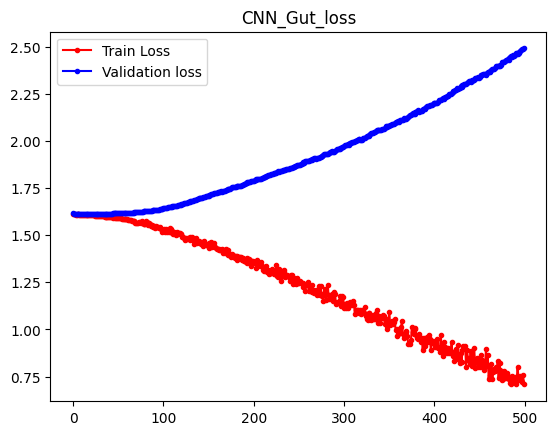

In [249]:
title = "CNN_Gut_loss"
fig, ax = plt.subplots()
ax.plot(history1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(history1.history["val_loss"],'b', marker='.', label="Validation loss")
ax.legend()
plt.title(title)
plt.savefig(title+'.png')

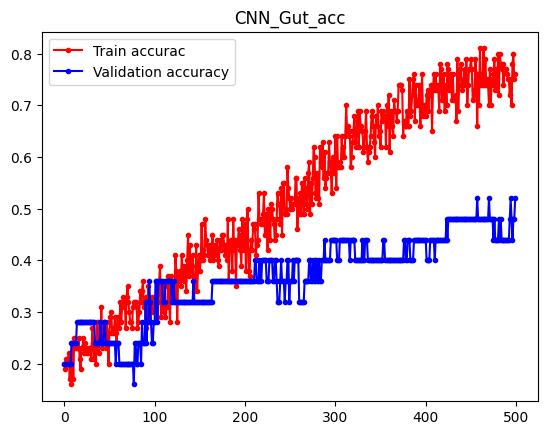

In [250]:
fig, ax = plt.subplots()
title = "CNN_Gut_acc"
ax.plot(history1.history["accuracy"],'r', marker='.', label="Train accurac")
ax.plot(history1.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
ax.legend()
plt.title(title)

plt.savefig(title+'.png')

No dropout and higher learning rate resulted in much overfitting very fast (50 epochs) and resulting accuracy was 0.2

adding dropout and changing values helped a bit evelvating accuracy after 150 epochs to 0.36 

changing dropout to 0.5 made accuracy 0.4

having lower learning rate 0.0001 and 500 epochs we will have 0.5 accuracy we could try more but we can observe overfitting to our data 